In [7]:
# Library Imports
import pygmt
import pandas as pd
import numpy as np

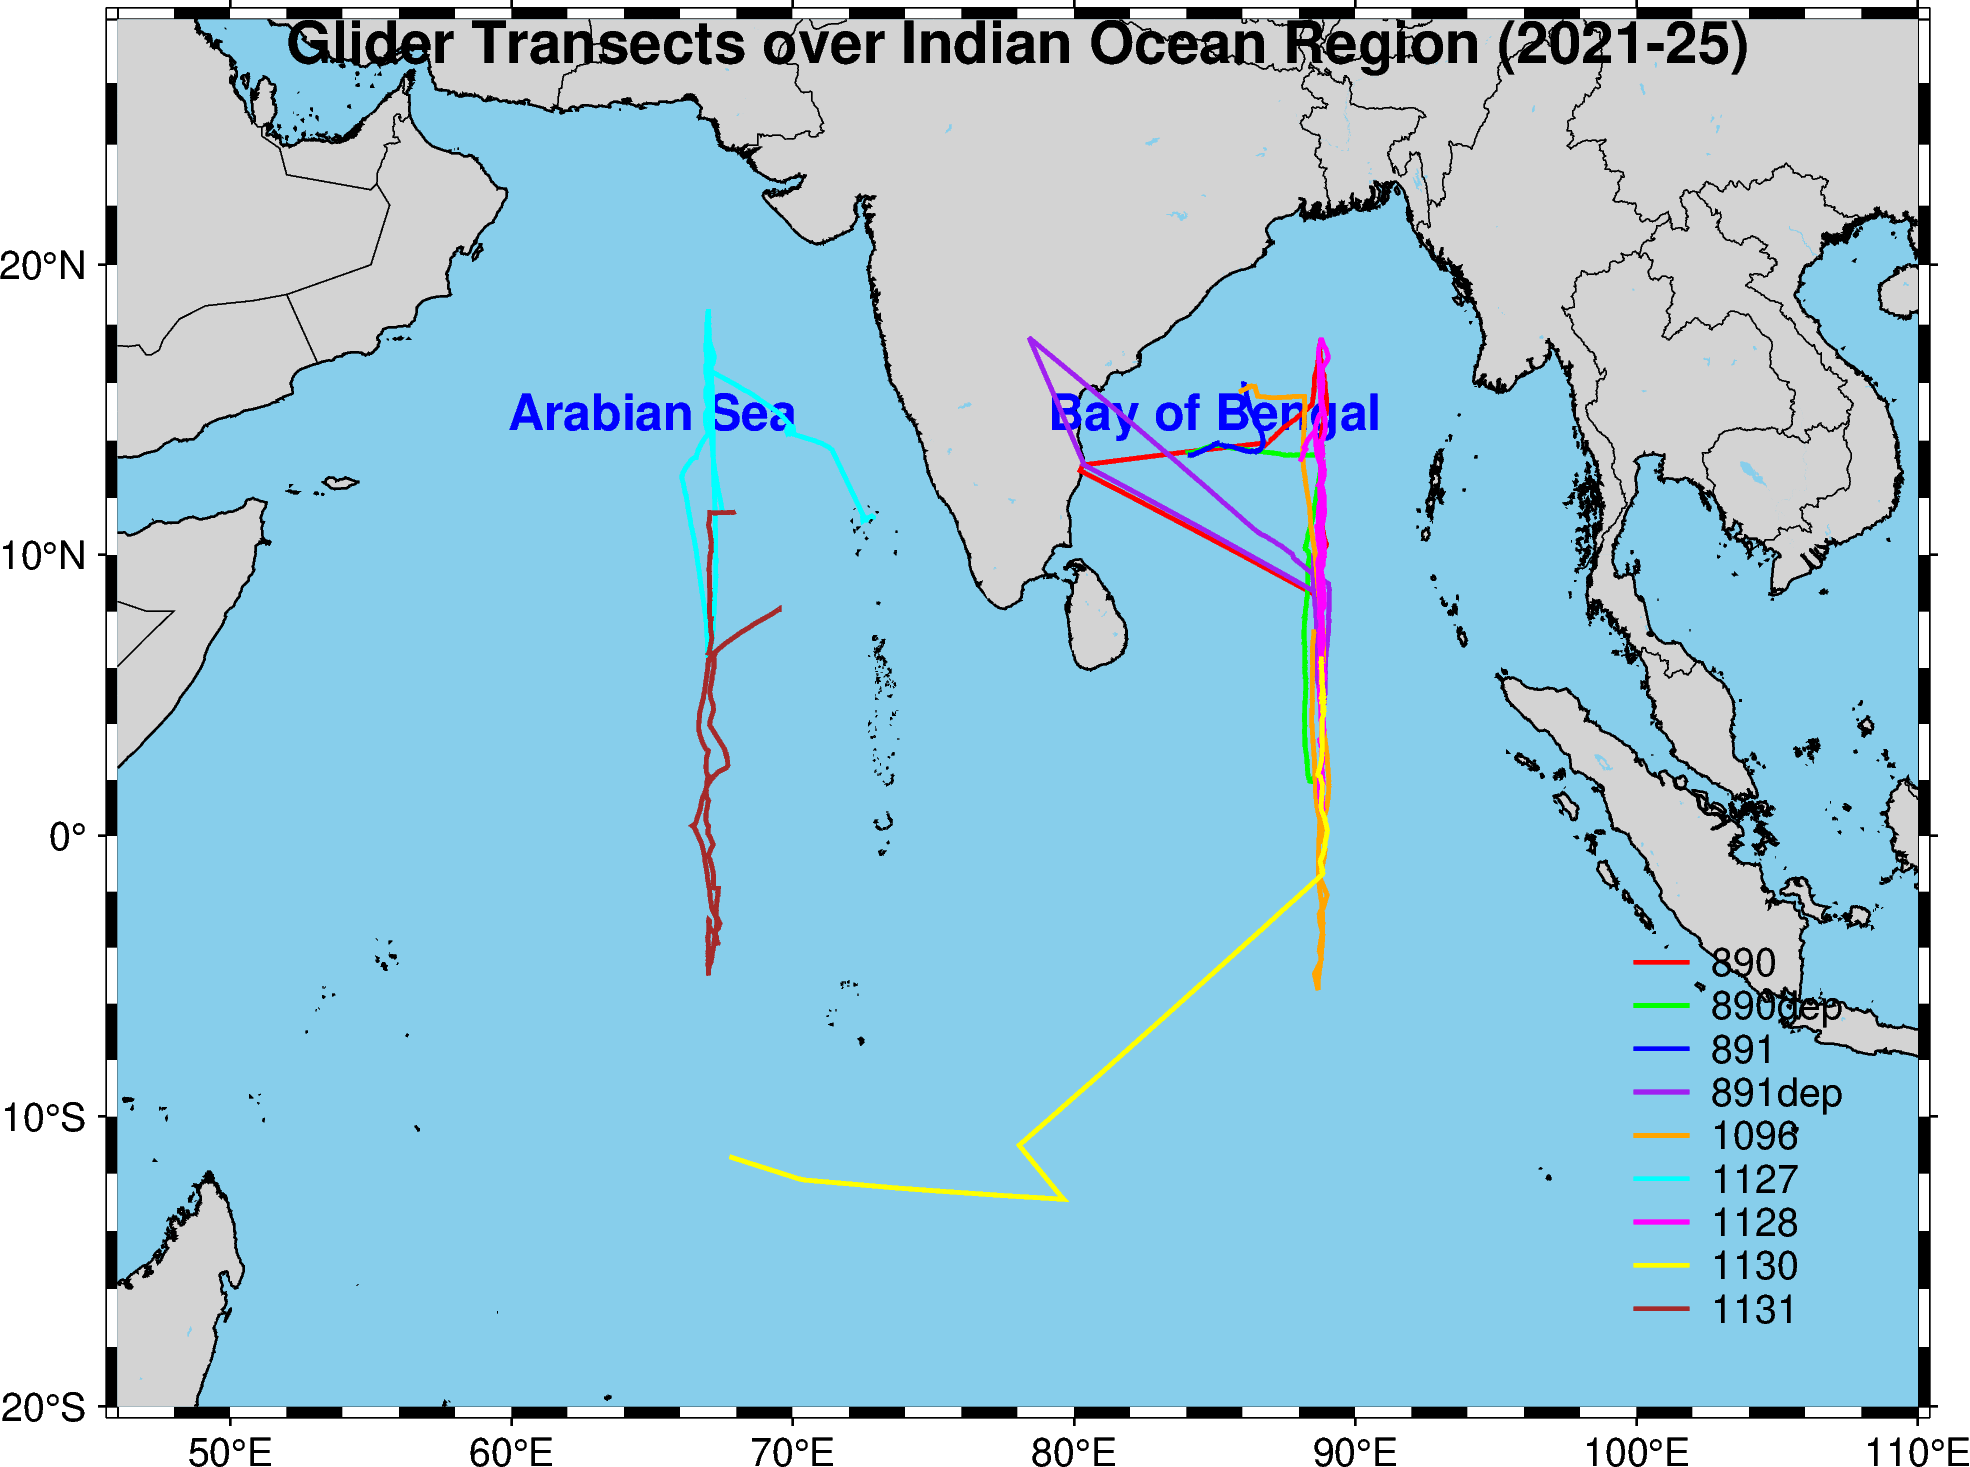

In [23]:
# Loading Glider Transects Data from CSV files

'''
mission_files = [f'mission_{i}' for i in range(1,11)]
for i, mission_name in enumerate(mission_files, start=1):
    transect_data = pd.DataFrame({
        "longitude":np.random.uniform(48, 105, 50),
        "latitude": np.random.uniform(-20, 28, 50)
    })
    transect_data.to_csv(f"glider_transect_{mission_name}.csv", index = False)
'''
glider_transect_files = [
    "track_890.csv",
    "track_890dep.csv",
    "track_891.csv",
    "track_891dep.csv",
    "track_1096.csv",
    "track_1127.csv",
    "track_1128.csv",
    "track_1130.csv",
    "track_1131.csv"
]

# Define a list of colors for glider transects
glider_colors = [
    "red", "green", "blue", "purple", "orange", "cyan", "magenta", "yellow", "brown", "pink"
]
# Map Initialization

fig = pygmt.Figure()
fig.basemap(region=[46, 110, -20, 28], projection="M6i", frame="af")
fig.coast(land='lightgray', water='skyblue', borders=[1,2],shorelines="1/thinner")

# Add map title
fig.text(text="Glider Transects over Indian Ocean Region (2021-25)", position="TC", font="14p,Helvetica-Bold,black")

# Add region labels
fig.text(text="Bay of Bengal", x=85, y=15, font="12p,Helvetica-Bold,blue")
fig.text(text="Arabian Sea", x=65, y=15, font="12p,Helvetica-Bold,blue")

# Plot Glider Transects
for track_file, color in zip(glider_transect_files, glider_colors):
    mission_name = track_file.split("_")[-1].replace(".csv", "") 
    transect_data=pd.read_csv(track_file)
   
    fig.plot(
        x=transect_data["Longitude"],
        y=transect_data["Latitude"],
        pen=f"1p,{color}", label=mission_name
    )

# Add Legend
fig.legend(position = "JBR+jBR+o0.5c", box='1p, black, gray')
#fig.legend(position="JBR+jBR+o0.5c", box=True)

fig.savefig("glider_transects_io_2.jpeg")

# Show Map
fig.show()